In [1]:
import pandas as pd
import numpy as np
import piplite
await piplite.install('seaborn')

<ipython-input-1-cec0a3d86e2d>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

In [4]:
await download(file_path, "usedcars.csv")
file_name="usedcars.csv"

In [5]:
df = pd.read_csv(file_name, header=0)

In [6]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [8]:
# list the data types for each column
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [ ]:
#Question #1:
#What is the data type of the column "peak-rpm"?

In [9]:
df['peak-rpm'].dtypes

dtype('float64')

In [ ]:
# Question #2: 
# Find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower.

In [11]:
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


In [ ]:
#Positive Linear Relationship 
#find the scatterplot of "engine-size" and "price".

(0.0, 52987.156896335444)

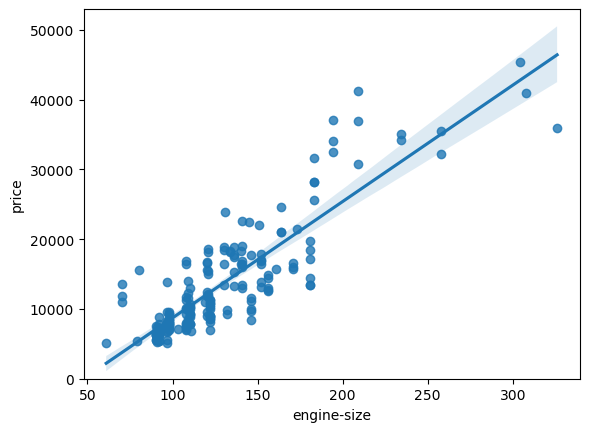

In [12]:
# Engine size as potential predictor variable of price

sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [ ]:
# looks like a positive correlation

In [ ]:
#  scatterplot of "highway-mpg" and "price".

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

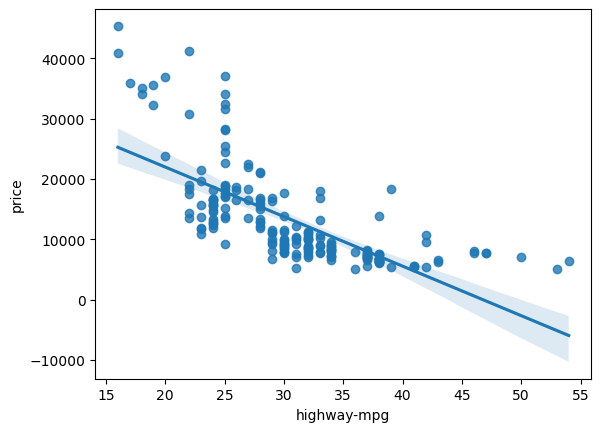

In [14]:
sns.regplot(x="highway-mpg", y="price", data=df)
#plt.ylim(0,)

In [ ]:
# comments -ve correlation

In [15]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


In [ ]:
# which is -0.704692

In [16]:
#Let's see if "peak-rpm" is a predictor variable of "price".

df[['peak-rpm', 'price']].corr()


,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [ ]:
# looks like a very weak correlation, -0.101616

In [ ]:
#Question 3 a): 
#Find the correlation between x="stroke" and y="price".

In [ ]:
#Question 3 b):
#Given the correlation results between "price" and "stroke", do you expect a linear relationship?

<AxesSubplot:xlabel='stroke', ylabel='price'>

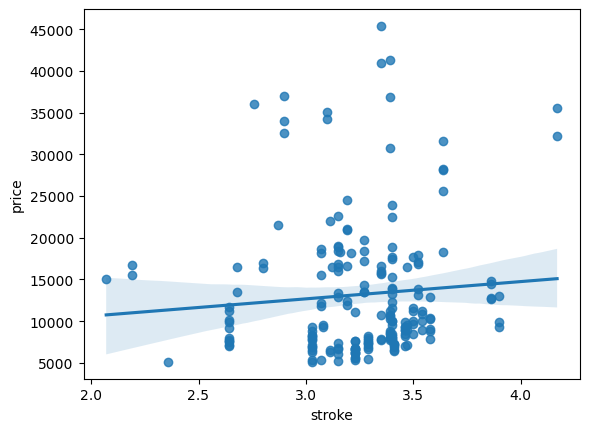

In [17]:
sns.regplot(x="stroke", y="price", data=df)

In [18]:
# #There is a weak correlation between the variable 'stroke' and 'price.' as such regression will not work well.

df[['stroke', 'price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


In [ ]:
# relationship between "body-style" and "price".

<AxesSubplot:xlabel='body-style', ylabel='price'>

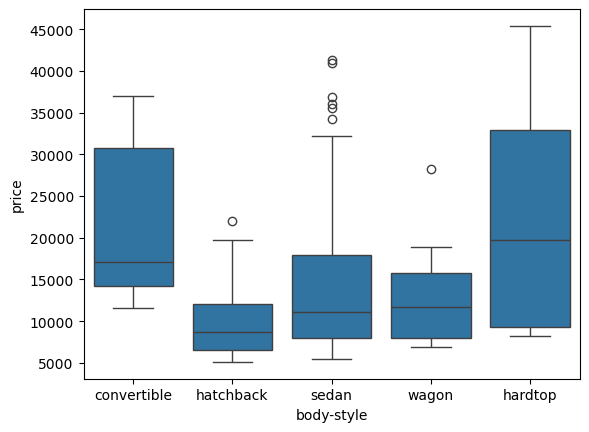

In [21]:
sns.boxplot(x="body-style", y="price", data=df)

In [22]:
#  the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price. 

<AxesSubplot:xlabel='engine-location', ylabel='price'>

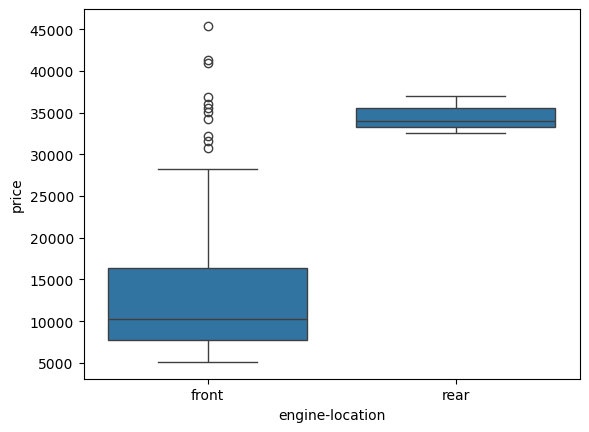

In [20]:
sns.boxplot(x="engine-location", y="price", data=df)

In [ ]:
#looks like engine location is a good predictor for price

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

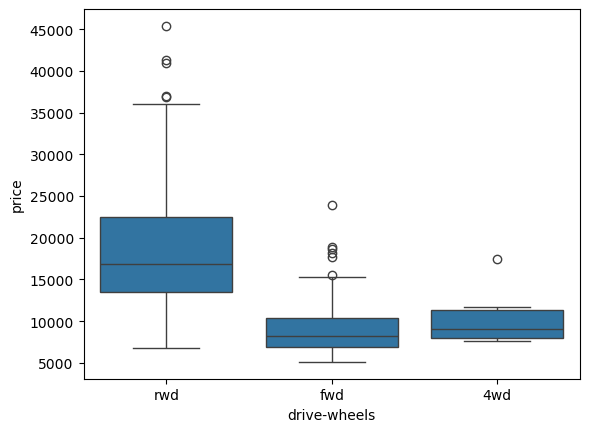

In [23]:
# drive-wheels and price
sns.boxplot(x="drive-wheels", y="price", data=df)

In [ ]:
# distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.

In [24]:
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [25]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [26]:
# rename the index to 'drive-wheels':

In [28]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [29]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,198
rear,3


In [ ]:
# Basics of Grouping

In [ ]:
#  see that there are 3 different categories of drive wheels.

In [30]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [32]:
# select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one".

df_group_one = df[['drive-wheels','body-style','price']]

In [33]:
# grouping results
df_grouped = df_group_one.groupby(['drive-wheels'], as_index=False).agg({'price': 'mean'})
df_grouped

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [34]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [35]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [36]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [ ]:
#Question 4:
#Use the "groupby" function to find the average "price" of each car based on "body-style".

In [37]:
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [38]:
import matplotlib.pyplot as plt
%matplotlib inline 

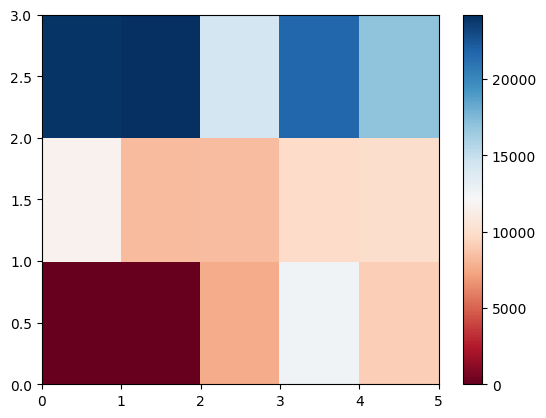

In [39]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

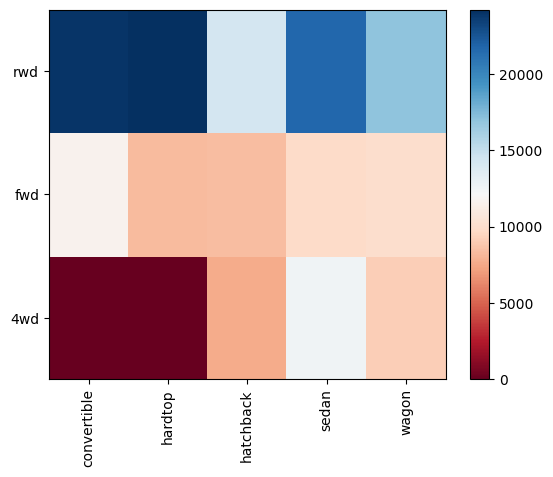

In [40]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [ ]:
# Correlation and Causation

p-value is 
 0.001: we say there is strong evidence that the correlation is significant.
the p-value is 
 0.05: there is moderate evidence that the correlation is significant.
the p-value is 
 0.1: there is weak evidence that the correlation is significant.
the p-value is 
 0.1: there is no evidence that the correlation is significant.

In [41]:
#stats" module in the "scipy" library.

from scipy import stats

In [42]:
# Wheel-Base vs. Price

pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P =  6.36905742825956e-48


In [ ]:
#Since the p-value is 
 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).

In [43]:
# Length vs. Price

pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483643  with a P-value of P =  8.016477466158871e-30


In [ ]:
# p-value is 
 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).

In [44]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522663  with a P-value of P = 9.200335510485071e-38


In [ ]:
#Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

In [45]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455188  with a P-value of P = 9.26549162219582e-64


In [ ]:
Since the p-value is 
 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).

In [46]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844684  with a P-value of P =  2.3211320655672357e-29


In [ ]:
Since the p-value is 
 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.

In [47]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.7046922650589532  with a P-value of P =  1.7495471144475574e-31


In [ ]:
Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.